In [39]:
#TAREA 2 DATOS ESPACIALES
#ALUMNO: JUAN DIEGO POZO ORTIZ
#CÓDIGO: 20210679

In [20]:
#!pip install geopandas
#!pip install matplotlib
#!pip install folium matplotlib mapclassify

  Using cached folium-0.14.0-py2.py3-none-any.whl (102 kB)
  Using cached branca-0.6.0-py3-none-any.whl (24 kB)
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     --------------------------------- ------ 51.2/60.4 kB 2.6 MB/s eta 0:00:01
     ---------------------------------------- 60.4/60.4 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ----------------- ---------------------- 0.7/1.6 MB 22.5 MB/s eta 0:00:01
   ------------------------------------- -- 1.5/1.6 MB 19.7 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 15.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.2 MB 10.2 MB/s eta 0:00:01
   -- ------------------------------------- 0.5/9.2 MB 6.6 MB/s eta 0:00:02
   --- ------------------------------------ 0.7/9.2 MB 5.7 MB/s eta 0:00:02
   --- ------------------------------------ 0.8/9.2 MB 4.7

In [2]:
import os, geopandas as gpd

countries=gpd.read_file(os.path.join("maps","World_Countries","World_Countries.shp"))

In [3]:
type(countries)

geopandas.geodataframe.GeoDataFrame

In [4]:
countries.shape

(252, 2)

In [5]:
countries.columns

Index(['COUNTRY', 'geometry'], dtype='object')

In [6]:
rivers=gpd.read_file(os.path.join("maps","World_Hydrography","World_Hydrography.shp"))
cities=gpd.read_file(os.path.join("maps","World_Cities","World_Cities.shp"))

In [7]:
rivers.shape

(98, 3)

In [8]:
cities.shape

(610, 4)

In [9]:
thailand=countries[countries.COUNTRY=='Thailand']

<Axes: >

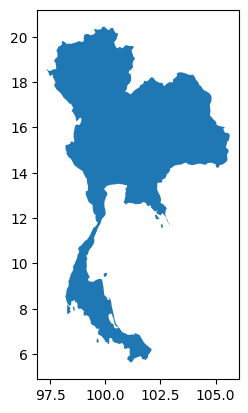

In [12]:

thailand.plot()

<Axes: >

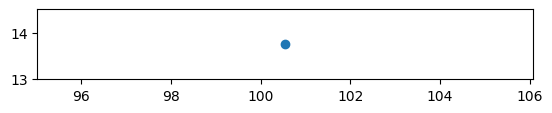

In [13]:
#VEREMOS LAS CIUDADES DENTRO DE TAILANDIA 

cities_thailand=cities[cities.COUNTRY=='Thailand']
cities_thailand.plot()

In [14]:
cities_thailand.head()

,NAME,COUNTRY,CAPITAL,geometry
231,Bangkok,Thailand,Y,POINT (100.55267 13.74557)


<Axes: >

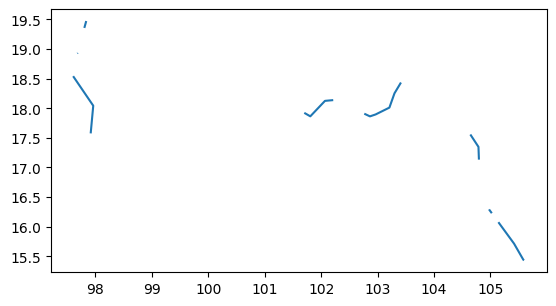

In [15]:
#RÍOS DE TAILANDIA 
rivers_thailand = gpd.clip(gdf=rivers, mask=thailand)
rivers_thailand.plot()

In [16]:
rivers_thailand.head()

,NAME,SYSTEM,geometry
40,Mekong,None,"MULTILINESTRING ((101.70156 17.92166, 101.8080..."
69,Salween,None,"MULTILINESTRING ((97.91654 17.57445, 97.96180 ..."


<Axes: >

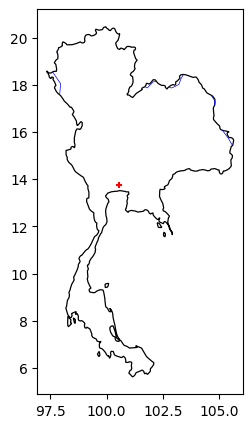

In [17]:
base = thailand.plot(facecolor="white", edgecolor='black', linewidth=0.9,figsize=(5,5))
cities_thailand.plot(marker='+', color='red', markersize=20,ax=base)
rivers_thailand.plot(edgecolor='blue', linewidth=0.5,ax=base)

In [21]:
thailandCoord = [20.593684, 78.96288]

In [22]:
m = cities_thailand.explore(location=thailandCoord,
                   zoom_start=4,
                   tiles='CartoDB positron',
                   color='red',
                   name="cities") 
m = rivers_thailand.explore(m=m, color="blue",
                   name="rivers")
m

In [23]:
thailand.crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [24]:
thailand.centroid


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14204\1526914381.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  thailand.centroid


213    POINT (101.01744 15.12733)
dtype: geometry

In [25]:
thailand.to_crs(4239).crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [26]:
thailand.to_crs(4239).centroid

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14204\491468615.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  thailand.to_crs(4239).centroid


213    POINT (101.02088 15.12572)
dtype: geometry

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14204\992306224.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  thailand.to_crs(4239).centroid.plot(color='Black',ax=base4239)


<Axes: >

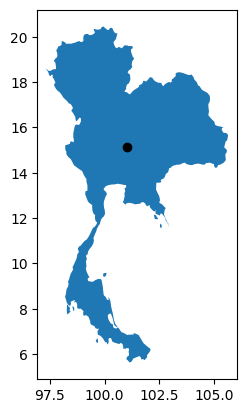

In [27]:
base4239=thailand.to_crs(4239).plot()
thailand.to_crs(4239).centroid.plot(color='Black',ax=base4239)

In [28]:
thailand_4239=thailand.to_crs(4239)
cities_thailand=cities[cities.COUNTRY=='Thailand']
cities_4239=cities_thailand.to_crs(thailand_4239.crs)
rivers_4239=rivers.to_crs(thailand_4239.crs)
rivers_4239=gpd.clip(gdf=rivers_4239,mask=thailand_4239)

<Axes: >

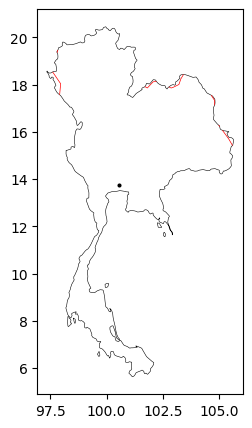

In [29]:
base = thailand_4239.plot(facecolor="white", edgecolor='black', linewidth=0.4,figsize=(5,5))
cities_4239.plot(marker='.', color='black', markersize=15,ax=base)
rivers_4239.plot(edgecolor='red', linewidth=0.5,ax=base)

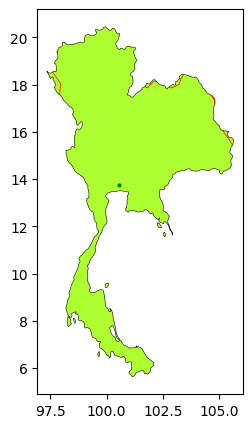

In [30]:
import matplotlib.pyplot as plt
basethailand = thailand_4239.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5))
map2=cities_4239.plot(marker='.', color='green', markersize=15,ax=basethailand)
mapEndthailand=rivers_4239.plot(edgecolor='red', linewidth=0.5,ax=basethailand)
plt.savefig(os.path.join("Figures",'mapEnd.jpg'))

In [31]:
countries.to_file(os.path.join("maps","worldmaps.gpkg"), layer='countries', driver="GPKG")
cities.to_file(os.path.join("maps","worldmaps.gpkg"), layer='cities', driver="GPKG")
rivers.to_file(os.path.join("maps","worldmaps.gpkg"), layer='rivers', driver="GPKG")

In [65]:
# link_worldmaps=

In [66]:
#from  fiona import listlayers

#listlayers(link_worldmaps)


In [ ]:
# countries_prueba=gpd.read_file(link_worldmaps,layer='countries')
# cities_prueba=gpd.read_file(link_worldmaps,layer='cities')
# rivers_prueba=gpd.read_file(link_worldmaps,layer='rivers')

In [ ]:
# base_prueba= countries.plot(facecolor='gainsboro')
# cities_prueba.plot(ax=base_prueba, markersize=0.5, color='green') 
# rivers_prueba.plot(ax=base_prueba, linewidth=0.5)

In [ ]:
# import os 
# thailand_4239.to_file(os.path.join("maps","thailand_4239","thailandMaps_4239.gpkg"), layer='country', driver="GPKG")
# cities_4239.to_file(os.path.join("maps","thailand_4239","thailandMaps_4239.gpkg"), layer='cities', driver="GPKG")
# rivers_4239.to_file(os.path.join("maps","thailand_4239","thailandMaps_4239.gpkg"), layer='rivers', driver="GPKG")

In [ ]:
# thailandMaps=


In [ ]:
#listlayers(thailandMaps)

In [ ]:
# countries=gpd.read_file(thailandMaps,layer='country')
# cities=gpd.read_file(thailandMaps,layer='cities')
# rivers=gpd.read_file(thailandMaps,layer='rivers')

In [ ]:
#base= countries.plot(facecolor='gainsboro')
#cities.plot(ax=base, markersize=0.5, color='green') 
#rivers.plot(ax=base, linewidth=0.5)